## Classification

In [19]:
import pickle

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot  as plt

import pandas as pd
import seaborn as sns
data = pd.read_csv('../../data_cleaning/Cleaned_data.csv')
data = data.drop('Unnamed: 0', axis=1)
data.tail()


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Marital_Status,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
10105,Existing Customer,50,0,2,0,40,3,2,3,4003.0,...,0,1,0,0,0,0,1,0,0,0
10106,Attrited Customer,41,0,2,3,25,4,2,3,4277.0,...,0,1,0,0,0,0,1,0,0,0
10107,Attrited Customer,44,1,1,1,36,5,3,4,5409.0,...,0,0,0,0,1,0,1,0,0,0
10108,Attrited Customer,30,0,2,2,36,4,3,3,5281.0,...,0,1,0,0,0,0,1,0,0,0
10109,Attrited Customer,43,1,2,1,25,6,2,4,10388.0,...,0,0,0,0,1,0,0,0,0,1


In [20]:
# data.columns

In [21]:
# data.dtypes

In [22]:
# Select target and features

# Select features
features = data.drop(['Attrition_Flag'], axis=1)

# Select target
target = data['Attrition_Flag']

target.head()


0    Existing Customer
1    Existing Customer
2    Existing Customer
3    Existing Customer
4    Existing Customer
Name: Attrition_Flag, dtype: object

In [23]:
# Label target
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
from sklearn.preprocessing import LabelEncoder
# set_config(transform_output="pandas")
lb = LabelEncoder()

lb.fit(target)
target_names = lb.classes_ # save the taget names for classification report
target_imbalance = target
target = lb.transform(target)


## Plot target imbalance

Text(0.5, 0.98, 'Imbalanced target')

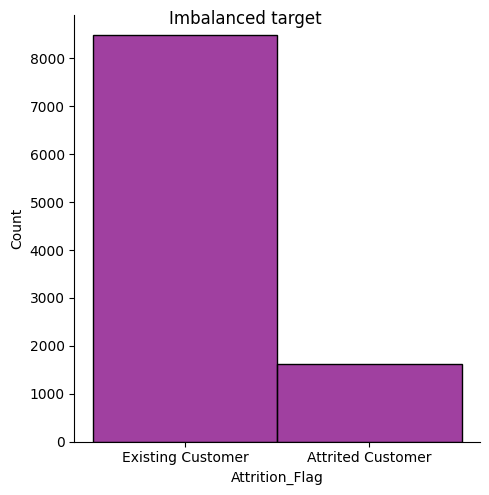

In [24]:
imbalance_graph = sns.displot(data['Attrition_Flag'],color='purple')
imbalance_graph.fig.suptitle('Imbalanced target')

In [25]:
# Store label mapping to assign target names in classification report
lb_name_mapping = dict(zip(lb.classes_, lb.transform(lb.classes_)))
print(lb_name_mapping)

{'Attrited Customer': 0, 'Existing Customer': 1}


## Split Train Test

In [26]:
# Split the Samples to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=38)
y_train

array([0, 1, 1, ..., 1, 1, 0])

## Under and Over Sampling

#### only on train set, so after splitting

In [27]:

ros = RandomOverSampler(random_state=0, sampling_strategy=.2)

X_train, y_train = ros.fit_resample(X_train, y_train)


Text(0.5, 0.98, 'Random Over Sampled target')

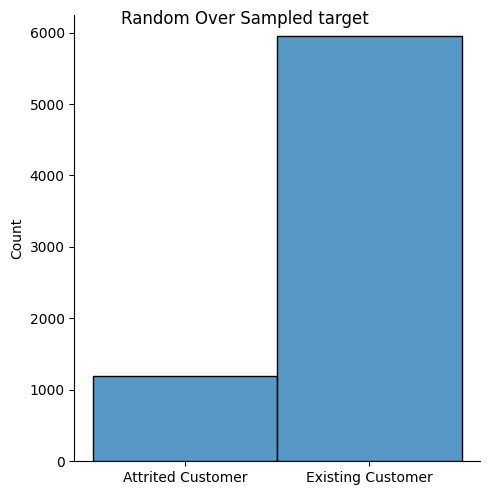

In [28]:
target_ROS = lb.inverse_transform(y_train)
ROS_graph = sns.displot(target_ROS)
ROS_graph.fig.suptitle('Random Over Sampled target')

In [29]:
# Standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Build X_train df for data visualization
X_train_df = pd.DataFrame(X_train, columns=features.columns).add_suffix('_scaled')
X_train_df.head()

,Customer_Age_scaled,Gender_scaled,Dependent_count_scaled,Marital_Status_scaled,Months_on_book_scaled,Total_Relationship_Count_scaled,Months_Inactive_12_mon_scaled,Contacts_Count_12_mon_scaled,Credit_Limit_scaled,Total_Revolving_Bal_scaled,...,Income_Category_$120K +_scaled,Income_Category_$40K - $60K_scaled,Income_Category_$60K - $80K_scaled,Income_Category_$80K - $120K_scaled,Income_Category_Less than $40K_scaled,Income_Category_Unknown_scaled,Card_Category_Blue_scaled,Card_Category_Gold_scaled,Card_Category_Platinum_scaled,Card_Category_Silver_scaled
0,-0.907711,-1.063067,0.517820,0.195709,-0.867068,0.122031,0.652897,1.393830,-0.699803,-1.423485,...,-0.274747,-0.464327,2.487633,-0.420153,-0.740522,-0.350005,0.266699,-0.102351,-0.04886,-0.238115
1,-0.038481,0.940675,0.517820,0.195709,-0.118488,1.406771,2.635615,-1.321799,-0.712771,-0.070195,...,-0.274747,-0.464327,-0.401989,-0.420153,1.350398,-0.350005,0.266699,-0.102351,-0.04886,-0.238115
2,-0.535184,0.940675,-1.029355,0.195709,0.006275,0.122031,0.652897,-1.321799,-0.699473,0.173175,...,-0.274747,-0.464327,-0.401989,-0.420153,1.350398,-0.350005,0.266699,-0.102351,-0.04886,-0.238115
3,0.085695,-1.063067,0.517820,0.195709,0.255801,-1.805080,0.652897,-0.416589,2.575314,-1.423485,...,-0.274747,-0.464327,-0.401989,2.380084,-0.740522,-0.350005,0.266699,-0.102351,-0.04886,-0.238115
4,0.085695,-1.063067,0.517820,0.195709,-0.118488,0.764401,-1.329821,-0.416589,0.965891,0.149822,...,-0.274747,-0.464327,2.487633,-0.420153,-0.740522,-0.350005,0.266699,-0.102351,-0.04886,-0.238115


In [30]:
# Use a KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
k_range = list(range(1,10))
param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1)
# Train the model with the train data
grid_search = grid.fit(X_train, y_train)
print(X_train.shape)

# print(grid_search.best_params_)
# print(grid_search.best_score_ *100)
print(f"Best result for {grid_search.best_params_.get('n_neighbors')} neighbors\nwith an accuracy of {round(grid_search.best_score_*100, 2)} %")
# # Make a predition on the X_test datas
# pred = knn.predict(X_test)
# # Compare the prediction with the y_test
# accuracy = knn.score(X_test, y_test)
# print(f'Test accuracy:{accuracy}')


Fitting 10 folds for each of 9 candidates, totalling 90 fits
(7138, 32)
Best result for 9 neighbors
with an accuracy of 87.53 %


In [31]:
# Run the model with the best parameters
optimal_kn = grid_search.best_params_.get('n_neighbors')

knn_optimal = KNeighborsClassifier(n_neighbors=optimal_kn)
knn_optimal.fit(X_train, y_train)
accuracy_test = round(knn_optimal.score(X_test, y_test),3)   # model predict on X_test, and compare pred to y_test
print(f'Test sample accuracy: {accuracy_test}')

Test sample accuracy: 0.873


In [32]:
# Store trained model in pickle format
# with open('./model/classification/classification_model.pkl', 'wb') as file:
#     pickle.dump(knn_optimal, file)

In [33]:
# Evaluate your model
from sklearn.metrics import classification_report
# "Attrition_Flag": {"Existing Customer":1 , "Attrited Customer": 0}}
pred = knn_optimal.predict(X_test)

print(classification_report(y_test, pred, target_names=target_names))

                   precision    recall  f1-score   support

Attrited Customer       0.79      0.31      0.45       498
Existing Customer       0.88      0.98      0.93      2535

         accuracy                           0.87      3033
        macro avg       0.83      0.65      0.69      3033
     weighted avg       0.86      0.87      0.85      3033



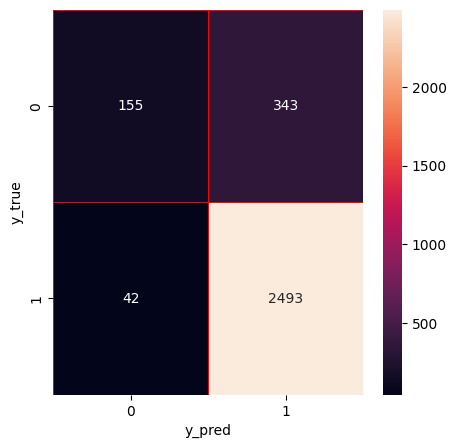

In [34]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, pred)
#cm vizualization

import seaborn as sns 
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### Prediction

In [35]:
# Empty features df for predictions, stored in model folder
X_form = pd.DataFrame(columns=features.columns)
# X_form.to_pickle('./model/classification/X_form.pkl')

In [36]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Convert the sparse matrix to a pandas DataFrame
# graph_df = knn_optimal.kneighbors_graph().toarray()

# # Plot the graph using heatmap function of seaborn
# sns.heatmap(graph_df, cmap="Blues")
# plt.show()
